## IMPORTS

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import tensorflow as tf

import matplotlib.pyplot as plt

2025-03-20 23:08:49.756087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 23:08:50.195536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742504930.367420    8188 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742504930.426124    8188 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742504930.840343    8188 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## GENERATING SYNTHETIC DATA

In [4]:
np.random.seed(0)
x = np.random.rand(1000)

y = 3*x + 2 + np.random.normal(0, 0.1, 1000)
data = pd.DataFrame({'x': x, 'y': y})
print(f"Data shape: {data.shape}")
print(f"Maximum x: {data['x'].max()}")
print(f"Minimum x: {data['x'].min()}")
print(f"Maximum y: {data['y'].max()}")
print(f"Minimum y: {data['y'].min()}")
data.head()

Data shape: (1000, 2)
Maximum x: 0.9998085781169653
Minimum x: 0.0005459648969956543
Maximum y: 5.195401698689434
Minimum y: 1.9124125637166642


,x,y
0,0.548814,3.636271
1,0.715189,4.147496
2,0.602763,3.993249
3,0.544883,3.613233
4,0.423655,3.221063


## USING SKLEARN

0.9877991968962365


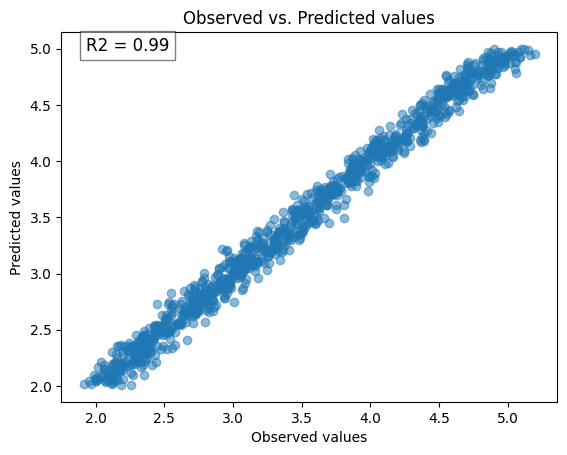

In [7]:
# Linear regression
x_reshaped = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)
r2 = r2_score(y, y_pred)
print(model.score(x_reshaped, y))


# Plot observed vs. predicted values
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Observed vs. Predicted values')
plt.annotate(f'R2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

## ONE NEURON - Tensorflow

/home/kip/projects/ADL/ADLEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


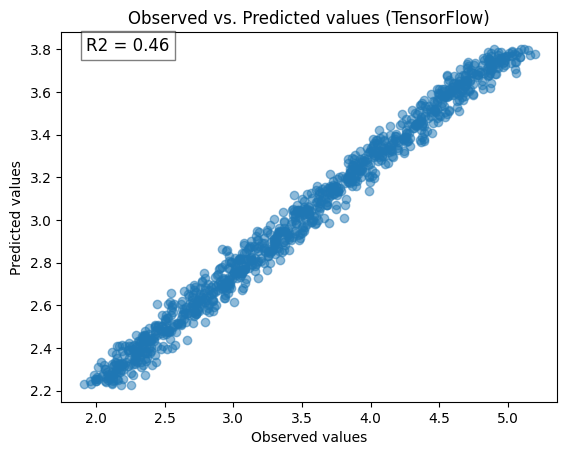

TensorFlow model weights: [array([[1.5759383]], dtype=float32), array([2.2260242], dtype=float32)]
Sklearn model coefficients: [2.99029623], intercept: 2.0077167249324077


In [8]:
# TensorFlow
tfmodel = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
tfmodel.compile(optimizer='adam', loss='mean_squared_error')
tfmodel.fit(x_reshaped, y, epochs=100, verbose=0)
tfy_pred = tfmodel.predict(x_reshaped).flatten()
tfr2 = r2_score(y, tfy_pred)

# Plot observed vs. predicted values
plt.scatter(y, tfy_pred, alpha=0.5)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Observed vs. Predicted values (TensorFlow)')
plt.annotate(f'R2 = {tfr2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Compare coefficients
weights_tf = tfmodel.layers[0].get_weights()
print(f'TensorFlow model weights: {weights_tf}')
print(f'Sklearn model coefficients: {model.coef_}, intercept: {model.intercept_}')